# Effect Size, P-Values and Power - Lab

## Introduction 

In this lab, you'll run simulations to continue to investigate the relationship between effect size, p-values, power and sample size!

## Objectives
You will be able to:
* Describe how effect size, sample size and p_value are related to each other. 
* Use Welch's t-test for distributions that do not have a normality assumption.
* Plot visualisations to confirm the calculations and intuitions towards p_value and effect size. 
* Explain how with a same effect size, we may see different p_values with increasing number of simulations. 

## Philosophical Review

Remember that the underlying question behind all hypothesis tests is:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

This is exactly what a p-value represents: the chance that the observed data would satisfy the null hypothesis. As such, if the p-value is sufficiently low, you can declare the results statistically significant and reject the null hypothesis. Recall that this threshold is defined as $\alpha$, and is also the rate of type I errors. In this lab, you'll investigate the robustness of p-values and their relation with effect-size and sample-size. 

## Import Starter Functions

To start, import the functions stored in the `flatiron_stats.py` file. It contains the stats functions that you previously coded in the last lab: `welch_t(a,b)`, `welch_df(a, b)` and `p_value(a, b, two_sided=False)`. You'll then use these functions below to further investigate the relationship between p-values and sample size.

In [1]:
#Your code here; import the contents from flatiron_stats.py
#You may also wish to open up flatiron_stats.py in a text editor to preview its contents.
from flatiron_stats import *

## Generating Random Samples

Before you start running simulations, it will be useful to have a helper function that will generate random samples. Write such a function below which generates 2 random samples from 2 normal distributions. The function should take 6 input parameters:

* m1 - The underlying population mean for sample 1
* s1 - The underlying population standard deviation for sample 1
* n1 - The sample size for sample 1

* m2 - The underlying population mean for sample 2
* s2 - The underlying population standard deviation for sample 2
* n2 - The sample size for sample 2

In [2]:
import numpy as np
def generate_samples(m1,s1,n1,m2,s2,n2):
    #Your code here; have the function create two random samples using the input parameters
    
    sample1 = np.random.normal(loc=m1, scale=s1, size=n1)
    sample2 = np.random.normal(loc=m2, scale=s2, size=n2)
    
    return sample1, sample2

## Running a Simulation

For your first simulation, you're going to investigate how the p-value of an experiment relates to sample size when both samples are from identical underlying distributions. To do this, use your `generate_samples()` function along with the `p_value_welch_ttest()` function defined in the flatiron_stats file. Use sample sizes from 5 to 750. For each sample size, simulate 100 experiments. For each of these experiments, generate 2 samples of the given sample size. Each sample should have a standard deviation of 1. The first sample should have a mean of 5 and the second should have a mean of 5 plus the effect size, you hope to detect. Calculate the corresponding p-values for a Welch's t-test for each of these sample-pairs. Finally, use the p-values to calculate the power of the test. Remember that for all of the simulations where the effect size does not equal zero, the null hypothesis is not true. Store the overall power from the 100 simulations along with the corresponding sample size and effect size. Use varying effect sizes such as [0, 0.01,.1,.2, .5, 1, 2]. Afterwards, you'll then plot power vs sample size for various effect sizes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
#Your code here

#Pseudo code outline
# for effect size:
#     for sample_size:
#         perform 100 simulations
#         calculate power
#         store effect_size, sample_size, power for simulations

a = 0.05

for effect_size in [0, 0.01, 0.1, 0.2, 0.5, 1, 2]:
    for sample_size in np.arange(5, 750, 5):
        p_val = 0
        for experiment in range(100):
            sample1, sample2 = generate_samples(5, 1, sample_size, 5+sample_size, 1, sample_size)
            p = p_value_welch_ttest(sample1, sample2)
            if p < a:
                p_val += 1
            
            

> **_I found this exercise to be too dense and in need of breaking down. What I started with is above, what is below is Flatiron's code, and I will attempt to break it down below that._**

In [35]:
# FI's code:

p_vs_e_n = {}
alpha = 0.05
for effect_size in [0, 0.01,.1,.2, .5, 1, 2]:
    n_vs_p = {}
    for n in range(5,750,5):
        p_vals = []
        for i in range(100):
            sample1, sample2 = generate_samples(m1=5, s1=1, n1=n, m2=5+effect_size, s2=1, n2=n)
            p = p_value_welch_ttest(sample1, sample2)
            p_vals.append(p)
        n_vs_p[n] = np.sum([1 for p in p_vals if p<alpha])/len(p_vals)
    p_vs_e_n[effect_size] = n_vs_p

#### Break down

So the first part is kind of like the structure, which would have been hard to figure out if you hadn't thought the whole problem through (it was also just a little unclear what they were asking for).

In [ ]:
p_vs_e_n = {}             #this is the final dictionary that everything will go in   

alpha = 0.05              #we weren't told the alpha but I'm guessing it will always be 0.05 

for effect_size in [0, 0.01,.1,.2, .5, 1, 2]:    #these are just the effect sizes we are experimenting with
    
    n_vs_p = {}           #this dictionary is being initialized here so it can separately store
                          #the different constituent values for each effect size--meaning it is going 
                          #to get overwritten for each value in the effect_size for loop

In [32]:
for n in range(5,750,5):   #these are the different sample sizes spaced 5 apart
    
    p_vals = []            #similarly to initializing the dictionary in the first block, this list of p-values
                           #will intentionally be overwrittten for each value in the range of this for loop (149)
    
    for i in range(100):   #these are the actual simulations we are running and we're doing such a large example
                           #I guess so we get accurate results
                           #this also means there will be 100 samples for every sample_size (here, 'n')
        
        sample1, sample2 = generate_samples(m1=5, s1=1, n1=n, m2=5+effect_size, s2=1, n2=n)
        
        p = p_value_welch_ttest(sample1, sample2)
        
        p_vals.append(p)

So the nested loops mean we will run code this many times:

In [26]:
len([0, 0.01,.1,.2, .5, 1, 2]) * len(np.arange(5,750, 5)) * 100 
#effect_size                     #sample_size              #experiments

104300

In [29]:
#or you can think about it like this

first = 0
second = 0
third = 0

for first in range(7):
    first += 1
    for second in range(149):
        second += 1
        for third in range(100):
            third += 1
first * second * third

104300

Finally we have the tricky part.

In [ ]:
n_vs_p[n] = np.sum([1 for p in p_vals if p<alpha])/len(p_vals)    

#above, this is creating a dictiony key for each sample size ("n"--149 values) and saving the power (one number)
#which is a result of the 100 tests just performed. This is the dictionary's key.



p_vs_e_n[effect_size] = n_vs_p

#This is putting the above dictionary in a new dictionary for each value in the effect_size (7)

In [ ]:
#Here's FI's code again:

p_vs_e_n = {}
alpha = 0.05
for effect_size in [0, 0.01,.1,.2, .5, 1, 2]:
    n_vs_p = {}
    for n in range(5,750,5):
        p_vals = []
        for i in range(100):
            sample1, sample2 = generate_samples(m1=5, s1=1, n1=n, m2=5+effect_size, s2=1, n2=n)
            p = p_value_welch_ttest(sample1, sample2)
            p_vals.append(p)
        n_vs_p[n] = np.sum([1 for p in p_vals if p<alpha])/len(p_vals)
    p_vs_e_n[effect_size] = n_vs_p

#### What's the process?

* First we create the **final dictionary**, the keys of which will be the each of the effect sizes, and the values of which will be **power ( 1-$\beta$ ) dictionaries** of their own. We also define our **alpha**.
* Then we write a `for` loop that is going to iterate through each of our effect sizes (total of 7); we also initialize the first **power dictionary** that will hold our power for each **_sample_** size (total of 149 power values which will be the result of 100 experiments each).
* Then we write the `for` loop for the experiments we will run.
* Then we run the experiments: we will create two random samples drawn from normal distributions, which will have small sample sizes at first (5) but eventually get very large (750).
* For each sample size we pull the samples just explained 100 times, calculate the p-values, and store those p-values in a list; since we pulled 100 pairs of samples, there will be 100 p-values, calculated using **Welche's t-test**, since we are comparing distributions which are not the same size.
* We then take a step back outside the loop and calculate the power of those 100 p-values by dividing the number of p's that were less than our alpha by the total number of experiments (always 100).
* This process of running the 100 experiments to get p-values, calculating the power, and sticking that in the **power dictionary**, happens 149 times. There will end up being 149 power dictionaries.
* Finally, we use the same dictionary method just mentioned to gradually add the the power dictionaries--5 to 750 (or 149 of them)--for each **effect size** (total of 7)--to the **final dictionary**. 

So the flow goes like this, from the inside out, which I think is a little easier to understand:
> Create two separate random samples of n size each & calculate p-value for comparing those samples<br>
Repeat 100x<br>
Calculate power for that 100-sample-pull and add to power dictionary<br>
Repeat 149x increasing n by 5 each time<br>
Add the 149 power dictionaries to the main dictionary<br>
Repeat 7x altering effect size each time

In [51]:
p_vs_e_n

{0: {5: 0.07,
  10: 0.07,
  15: 0.13,
  20: 0.09,
  25: 0.11,
  30: 0.1,
  35: 0.05,
  40: 0.1,
  45: 0.13,
  50: 0.09,
  55: 0.12,
  60: 0.12,
  65: 0.13,
  70: 0.15,
  75: 0.1,
  80: 0.1,
  85: 0.09,
  90: 0.17,
  95: 0.04,
  100: 0.09,
  105: 0.11,
  110: 0.15,
  115: 0.09,
  120: 0.12,
  125: 0.07,
  130: 0.1,
  135: 0.08,
  140: 0.1,
  145: 0.07,
  150: 0.12,
  155: 0.06,
  160: 0.05,
  165: 0.13,
  170: 0.08,
  175: 0.07,
  180: 0.18,
  185: 0.05,
  190: 0.07,
  195: 0.11,
  200: 0.12,
  205: 0.1,
  210: 0.11,
  215: 0.08,
  220: 0.13,
  225: 0.12,
  230: 0.12,
  235: 0.1,
  240: 0.07,
  245: 0.12,
  250: 0.1,
  255: 0.1,
  260: 0.08,
  265: 0.11,
  270: 0.07,
  275: 0.08,
  280: 0.13,
  285: 0.1,
  290: 0.06,
  295: 0.12,
  300: 0.1,
  305: 0.12,
  310: 0.11,
  315: 0.11,
  320: 0.13,
  325: 0.17,
  330: 0.09,
  335: 0.11,
  340: 0.13,
  345: 0.14,
  350: 0.16,
  355: 0.05,
  360: 0.1,
  365: 0.11,
  370: 0.08,
  375: 0.13,
  380: 0.1,
  385: 0.04,
  390: 0.09,
  395: 0.15,
  40

Now that you've simulated the data, go ahead and graph it! Label the x-axis sample size, the y-axis power, and be sure to include a legend for the various effect sizes.

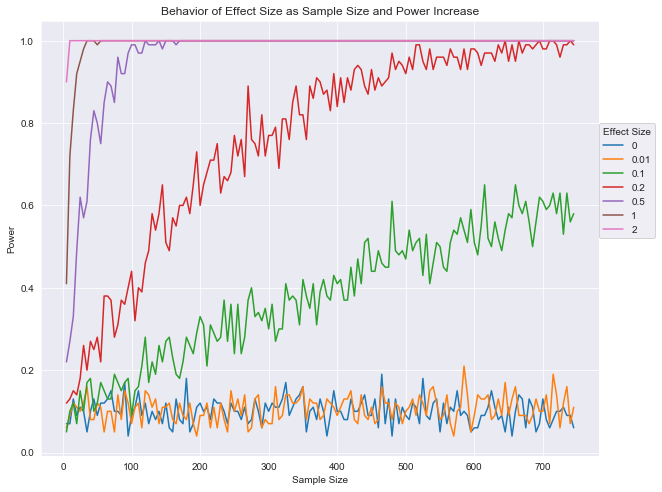

In [64]:
#You code here
plt.figure(figsize=(10,8))
plt.title("Behavior of Effect Size as Sample Size and Power Increase")
plt.xlabel("Sample Size")
plt.ylabel("Power")

df = pd.DataFrame(p_vs_e_n)
plt.plot(df)
plt.legend(labels=['0', '0.01', '0.1','0.2', '0.5', '1', '2'], title="Effect Size", loc=(1, 0.5))

plt.show()

As you can see, it's also typically incredibly difficult (if not impossible) to accuractely detect effect sizes below .1!

## Summary

This lesson summarizes and further builds upon the ideas that we saw in the previous labs. We learnt how p_value can be described as a function of effect size and for a given effect size, the p_value may get lower if we increase the sample size considerably. We also saw how p_value alone can not be used in order to identify some results as truly siginifcant, as this can be achieved when there is not a significant effect size. 